In [94]:
# My notes from the tuorial
## Logistic Regresssion 
a = """
Given a set of independent variables and a binary dependet variable, The logistic regression helps us estimate the probability of the dependent variable taking the 0/1 values. 


for ex. Given a set of employee attributes like salary, experience, position etc. what is the likelyhood that the employee quits his job (Here dependent var is quitting E {0,1} and salary, experience, position etc are independent vars) 


It just calculates the odds of the dependent var. 


Properties

* Unlike linear regression logistic regression cannot be estimated by OLE instead we use MLE. 
* Events are complementry ie. The sum of estimated probabilities of happening and not happening is 1 

The equation of regression for logistic regression is : 
            
            y = b0 + b1_x1 + b2_x2 + b3_x3 + b4_x4 ---- bn_xn

            where, 
                * y is the dependent var
                * x1 --- xn are independent vars
                * b(i)'s are the coefficients 

Now to estimate bi, We use MLE as the estimation for each.

Explaination: From the limited dataset that we have we cannot be 100% sure that y depends on some xi so we do a hypothesis test to figure that out with some confidence level say alpha. 

Here,
Null Hypothesis is bi = 0 
Alternate hypothesis is bi != 0 

If null hypothesis is not rejected then we we may say that y independent of xi, the the value of bi in the regression reqn is 0 and hence bi = 0 
If not, the there's a factor bi which defines the depedency of y on xi 

Say bi derived from our sample data follows some distribution, D ----(1. Take a note of this will refer this back)
This distribution itself is the MLE

With Ref. to Anand's presentation, 

In the output of logistic regression, Each coef bi has an associated Mean Value and Std Error which is essentially the Mean and Std deviation of the distribution of bi as in point 1. 
P-value is the p value obtained inthe hypothesis testing of bi. 

"""
x = 0

Text(0, 0.5, 'Pass')

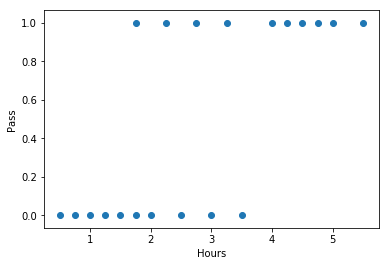

In [37]:
#Practice Exercises 

import pandas
import matplotlib.pyplot as plt
import numpy 
from termcolor import colored
from sklearn.linear_model import LogisticRegression

student_df = pandas.read_csv("./hours_pass.csv")
plt.scatter(student_df["Hours"],student_df["Pass"])
plt.xlabel("Hours")
plt.ylabel("Pass")

Note: The depedent var "Pass" is binary wrt to the independent variable Hours which is continuous 

For futher exploration the data is divided into two segments, Say Hours > 3 and Hours < 3  is the baseline model. For the purpose of Exercise 1 directly using the complete dataset as the training set.  

In [3]:
log_reg = LogisticRegression(solver='lbfgs')
X_train = numpy.array(student_df["Hours"]).reshape(-1,1)
Y_train = numpy.array(student_df["Pass"])

X_test = numpy.array(pandas.DataFrame({"Hours":[6]})["Hours"]).reshape(1,-1)
Y_test = None

log_reg.fit(X_train,Y_train)

# print(log_reg.classes_)
y_pred1 = log_reg.predict_proba(X_test)[:,1]  # There are two classes, 0-1 we just take the one we intend to analyze 
y_pred1

array([0.97706971])

The probability that a student will pass given he studied for 6 hrs in 0.977 as calculated above 

In [4]:
# Exercise 2 

student_df["Fail"] = student_df.apply(lambda x: int(abs(x["Pass"]-1)),axis = 1)

X_train = numpy.array(student_df["Hours"]).reshape(-1,1)
Y_train = numpy.array(student_df["Fail"])   # Check the reverse 

X_test = numpy.array(pandas.DataFrame({"Hours":[6]})["Hours"]).reshape(1,-1)
Y_test = None

log_reg.fit(X_train,Y_train)

# print(log_reg.classes_)
y_pred2 = log_reg.predict_proba(X_test)[:,1]  # There are two classes, 0-1 we just take the one we intend to analyze
# Note that here 1 = Fail 
y_pred2

array([0.02293029])

In [5]:
# Checking the sum of probabilities in both cases >>  Result = TRUE
s = y_pred1 + y_pred2
s

array([1.])

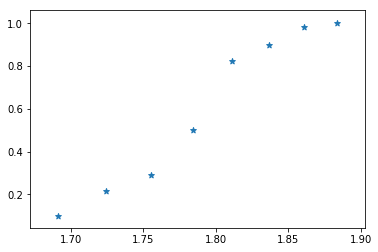

In [7]:
# Exercise 3 

dead_df = pandas.read_csv("./dead_beetles.csv")
dead_df["prob_of_death"] = dead_df.apply(lambda x: x["Dead beetles"]/x["Total number of beetles"], axis = 1)
plt.scatter(dead_df["Dose"],dead_df["prob_of_death"],marker="*")


The distribution of probabilitiy of death wrt Dosage varies as shown above 

The tilted S_shaped curve is a good indicator that logistic regression can be used to estimate the probability of death against the dose of CS2 

Two ways to regress this ==>

* First, transform the dataset to make dependent variable as binary for fitting it to logistic regression
* Second, fit a linear regression for >> ln(p/1-p)

In [8]:
# Transform the dataset to binary dependent variable
dead_df
observations = {"dose":[],"dead":[]}
for indx,row in dead_df.iterrows():
    deaths = [1]*int(row["Dead beetles"]) + [0]*(int(row["Total number of beetles"]) - int(row["Dead beetles"]))
    dose = [row["Dose"]]*int(row["Total number of beetles"])
    observations["dose"] += dose
    observations["dead"] += deaths

dead_df_binary = pandas.DataFrame(observations)
dead_df_binary[1:10]

,dose,dead
1,1.6907,1
2,1.6907,1
3,1.6907,1
4,1.6907,1
5,1.6907,1
6,1.6907,0
7,1.6907,0
8,1.6907,0
9,1.6907,0


In [11]:
# Part 1 : with Dose as Independent Variable
# Using the full dataset as the training data 
X_train = numpy.array(dead_df_binary["dose"]).reshape(-1,1)
Y_train = numpy.array(dead_df_binary["dead"])

log_reg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
log_reg.score(X_train,Y_train)

0.7733887733887734

In [13]:
# Part 2 
# Using sq of dose as independent variable
dead_df_binary["sq_dose"] = dead_df_binary.apply(lambda x: x["dose"]**2,axis = 1)

X_train = numpy.array(dead_df_binary["sq_dose"]).reshape(-1,1)
Y_train = numpy.array(dead_df_binary["dead"])

log_reg.fit(X_train,Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
log_reg.score(X_train,Y_train)

0.8274428274428275

**Conclusion** : 
The Accuracy of the logistic regression has improved by squaring the dose. 

c:\users\admin\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\admin\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\admin\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is 

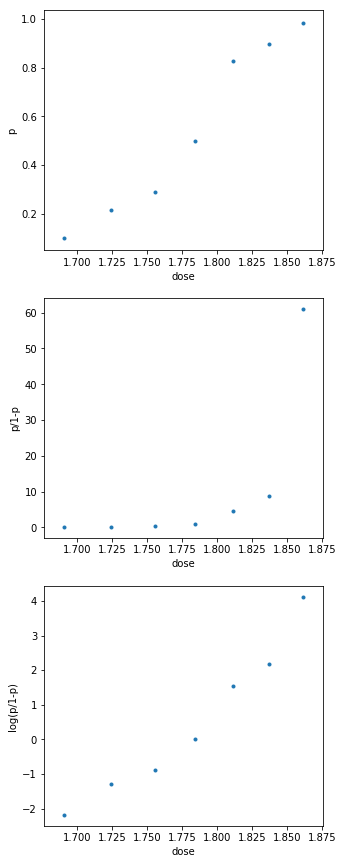

In [39]:
# Approach 2
dead_df
dead_df["1_minus_prob"] = dead_df.apply(lambda row : 1-row["prob_of_death"],axis = 1)
dead_df["logit"] = dead_df.apply(lambda row : row["prob_of_death"]/row["1_minus_prob"],axis = 1)
dead_df["log_logit"] = dead_df.apply(lambda row : numpy.log(row["logit"]),axis = 1) 

plt.figure(figsize = (5,15))

plt.subplot(311)
plt.scatter(dead_df["Dose"],dead_df["prob_of_death"],marker = ".")
plt.xlabel("dose")
plt.ylabel("p")

plt.subplot(312)
plt.scatter(dead_df["Dose"],dead_df["logit"],marker = ".")
plt.xlabel("dose")
plt.ylabel("p/1-p")

plt.subplot(313)
plt.scatter(dead_df["Dose"],dead_df["log_logit"],marker = ".")
plt.xlabel("dose")
plt.ylabel("log(p/1-p)")

dead_df = dead_df[:-1]
# dead_df


R-squared:  0.9610304502274627 
Adj R-Squared:  0.9512880627843283
Sum of Sq Error:  0.5568865648562402
coef :
 [30.32191084]
intercept :  -53.685621232771375


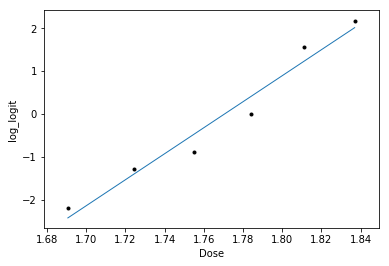

In [44]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

X = numpy.array(dead_df["Dose"]).reshape(-1,1)
y = dead_df["log_logit"]
# A summary function to analyse accuracy metrics
def summary(reg,X,y):
    print(colored("\nR-squared: ","blue"),reg.score(X, y),colored("\nAdj R-Squared: ","blue"),1 - (1-reg.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))
    yhat = reg.predict(X)
    print(colored("Sum of Sq Error: ","blue"),sum((y-yhat)**2))
    print(colored("coef :\n","blue"),reg.coef_)
    print(colored("intercept : ","blue"),reg.intercept_)
    return None

reg.fit(X,y)
summary(reg,X,y)

y_pred = reg.predict(X)

plt.scatter(X,y,color='black',marker=".")
plt.plot(X,y_pred, linewidth=1)
# plt.xticks(())
# plt.yticks(())
plt.xlabel("Dose")
plt.ylabel("log_logit")

plt.show()

In [46]:
# Exercise 4 

patient_df = pandas.read_csv("patients.csv")
patient_df = patient_df.rename(columns = {"Unnamed: 0":"category1",
                             "NewYork":"NewYork Sick",
                             "Unnamed: 2": "NewYork NotSick",
                             "Philadelphia":"Philadelphia Sick",
                             "Unnamed: 4":"Philadelphia NotSick"})[1:]

patient_df_dataset = {"site":[],"status":[],"sick":[]}

for indx,row in patient_df.iterrows():
    
    site = ["NewYork"]*(int(row["NewYork Sick"]) + int(row["NewYork NotSick"]))
    status = [row["category1"]]*(int(row["NewYork Sick"]) + int(row["NewYork NotSick"]))
    sick = [1]*int(row["NewYork Sick"]) + [0]*int(row["NewYork NotSick"])
    patient_df_dataset["site"] += site
    patient_df_dataset["status"] += status
    patient_df_dataset["sick"] += sick
    
    #print(len(site),len(status),len(sick))
    
    site = ["Philadelphia"]*(int(row["Philadelphia Sick"]) + int(row["Philadelphia NotSick"]))
    status = [row["category1"]]*(int(row["Philadelphia Sick"]) + int(row["Philadelphia NotSick"]))
    sick = [1]*int(row["Philadelphia Sick"]) + [0]*int(row["Philadelphia NotSick"])
    patient_df_dataset["site"] += site
    patient_df_dataset["status"] += status
    patient_df_dataset["sick"] += sick
    
patient_df_binary = pandas.DataFrame(patient_df_dataset)

lookup_dict = {"NewYork":1,
               "Philadelphia":0,
               "alcoholic":1,
               "nonAlcoholic":0}

patient_df_binary["t_site"] = patient_df_binary.apply(lambda x: lookup_dict[x["site"]], axis = 1)
patient_df_binary["t_status"] = patient_df_binary.apply(lambda x: lookup_dict[x["status"]], axis = 1)


In [47]:
# Split the data into trainging and Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(patient_df_binary[["t_site","t_status"]], patient_df_binary[["sick"]], test_size=0.25)

In [48]:
log_reg.fit(X_train,y_train)

c:\users\admin\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [64]:
# from sklearn.metrics import confusion_matrix
prediction_probs = log_reg.predict_proba(X_test)
numpy.unique(prediction_probs[:,0])


array([0.67756332, 0.81820358, 0.94628813, 0.97418236])

In [70]:
# Exercise 5
depress_data = pandas.read_csv("depress_r_data.csv")
depress_data

use_depress_data = depress_data[["drink","cases","sex"]]
use_depress_data[1:10]

,drink,cases,sex
1,1,0,1
2,1,0,2
3,2,0,2
4,1,0,2
5,1,0,1
6,2,0,2
7,2,0,1
8,1,1,2
9,1,0,1
